(280, 390, 3)
Type de données de l'image après conversion: uint8
(255, 359, 3)
Transformed shape: (255, 359, 3)
(227, 203, 3)
Transformed shape: (227, 203, 3)


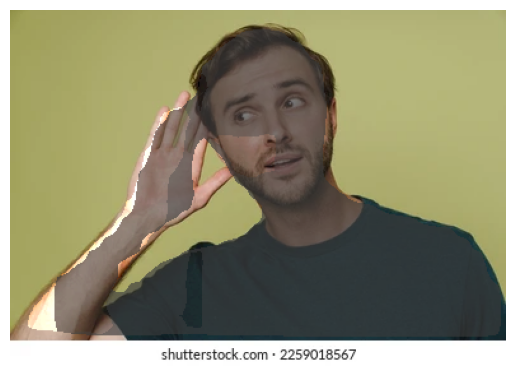

In [9]:
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn


image_path = "C:\\Users\\abassoma\\Documents\\Dataset\\p.jpg"
image = Image.open(image_path)
image_np = np.array(image)
print(image_np.shape)
print(f"Type de données de l'image après conversion: {image_np.dtype}")
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  
model.to('cpu')
image_tensor = torchvision.transforms.functional.to_tensor(image).unsqueeze(0).to('cpu')
with torch.no_grad():
    predictions = model(image_tensor)

# Extraire les boîtes englobantes, masques et labels
boxes = predictions[0]['boxes'].cpu().numpy()  
masks = predictions[0]['masks'].cpu().numpy()  
scores = predictions[0]['scores'].cpu().numpy()  
# Définir les transformations de couleur
color_jitter_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.82, contrast=0.92),       
])


for i, box in enumerate(boxes):
    if scores[i] > 0.35:  # Seuil de confiance
        # Dessiner la boîte englobante
        x1, y1, x2, y2 = box.astype(int)
        mask = masks[i, 0] > 0.78  
        colored_object = image_np[y1:y2, x1:x2].copy()  
        print(colored_object.shape)
        colored_object = Image.fromarray(colored_object) 
        print("Transformed shape:", np.array(colored_object).shape)

        colored_object = color_jitter_transforms(colored_object)  
        colored_object = np.array(colored_object) 
        mask = mask[y1:y2, x1:x2]  
        
        # Remplacer la région d'origine par la région colorée
        image_np[y1:y2, x1:x2][mask] = colored_object[mask]

plt.imshow(image_np)
plt.axis('off')
plt.show()

